Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                128       
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_4 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_5 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 6

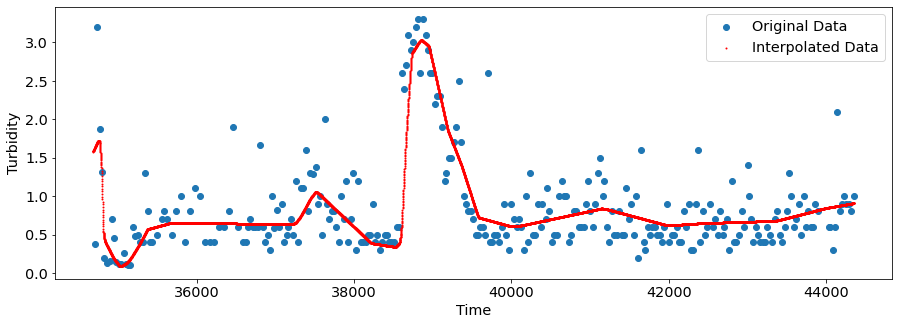

313/313 [==============================] - 0s 353us/step - loss: 4.0215e-16
['loss']


array([[0.1548531 ],
       [0.15998404],
       [0.17060637],
       [0.17158176],
       [0.17160235],
       [0.1716235 ],
       [0.17164356],
       [0.17166431],
       [0.17168507],
       [0.17170575],
       [0.17148481],
       [0.17120892],
       [0.17094631],
       [0.17067483],
       [0.1704034 ],
       [0.17013192],
       [0.16986048],
       [0.16958456],
       [0.22679581],
       [0.22925462],
       [0.23179582]], dtype=float32)

In [1]:
import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn
import tensorflow as tf
model = tf.keras.models.load_model('C:/Users/yanzh/Interpolation/Turbidity/saved_model/my_modelBB51_Turbidity')

# Check its architecture
model.summary()

df = pd.read_csv("C:/Users/yanzh/Desktop/Turbidity_data/BB51.csv")
time = df['time'].values
turbidity = df['turbidity'].values
df

#Transform the normalized scale to real scale
turbidity_min = 0.1
turbidity_max = 3.3
time_min = 34710.00                    
time_max = 44356.42                                

newtimepoints_scaled = np.linspace(time[0] - (time[1] - time[0]),time[-1], 10000)
y_predicted_scaled = model.predict(newtimepoints_scaled)

newtimepoints = newtimepoints_scaled*(time_max - time_min) + time_min
y_predicted = y_predicted_scaled*(turbidity_max - turbidity_min) + turbidity_min

# Display the result
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)
plt.scatter(time*(time_max - time_min) + time_min, turbidity*(turbidity_max - turbidity_min) + turbidity_min, label='Original Data')
plt.scatter(newtimepoints, y_predicted, c = 'red', s = 1, label = 'Interpolated Data')
plt.xlabel('Time')
plt.ylabel('Turbidity')
plt.legend()
plt.show()

model.evaluate(newtimepoints_scaled, y_predicted_scaled, batch_size=32)
print(model.metrics_names)

interpolation = model.predict([0.078682038
,0.084798297
,0.097445476
,0.103769065
,0.110092655
,0.116519909
,0.122636168
,0.128959757
,0.135283347
,0.141606936
,0.147930525
,0.15435778
,0.160474039
,0.166797628
,0.173121218
,0.179444807
,0.185768396
,0.192195651
,0.95569132
,0.958801282
,0.96201491
])
interpolation